In [72]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#load data
train_data=pd.read_csv('/content/train_v9rqX0R.csv')
test_data=pd.read_csv('/content/test_AbJTz2l.csv')

In [74]:
#read data
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [75]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [76]:
#check the shape of data
train_data.shape

(8523, 12)

In [77]:
test_data.shape

(5681, 11)

In [78]:
#data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [80]:
#describe data
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [81]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [82]:
#check null values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [83]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**filling missing values**

In [84]:
#check data types
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [85]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [86]:
#fill missing values in item weight by taking mean
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [87]:
test_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [88]:
#fill missing values in Outlet size by taking mode
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [89]:
test_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [90]:
#recheck null values
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [91]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [92]:
#drop columns Item_Identifier','Outlet_Identifier
train_data=train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
test_data=test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

**correlation**

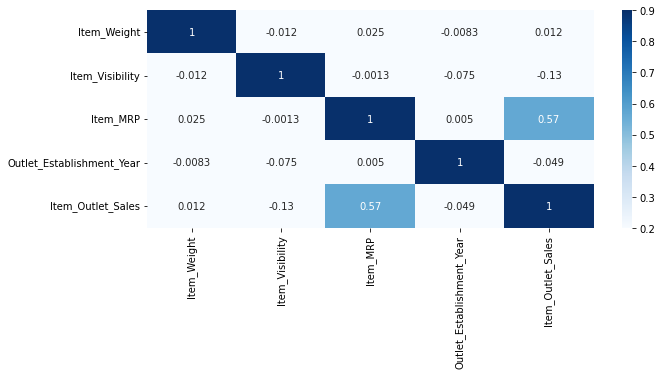

In [93]:
corrmatrix=train_data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='Blues')

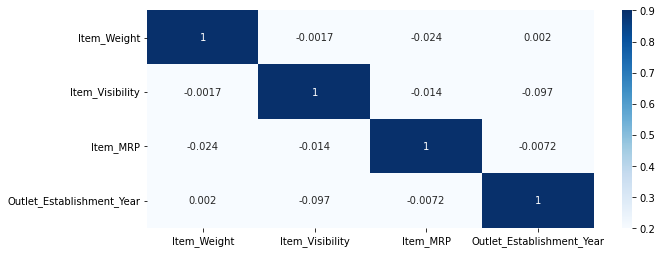

In [94]:
corrmatrix=test_data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='Blues')

**label encoding**

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:

label_encoder=LabelEncoder()

In [97]:
df=train_data.apply(LabelEncoder().fit_transform)

In [98]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,1,664,4,5592,4,1,0,1,2540
1,57,2,880,14,473,8,1,2,2,422
2,376,1,715,10,2901,4,1,0,1,1639
3,393,2,0,6,4227,3,1,2,0,670
4,265,1,0,9,627,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...
8518,125,1,3912,13,4955,1,0,2,1,2047
8519,233,2,3278,0,2023,5,1,1,1,516
8520,299,1,2302,8,1263,6,2,1,1,1018
8521,149,2,7175,13,1857,8,1,2,2,1466


In [99]:
df1=test_data.apply(LabelEncoder().fit_transform)

In [100]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,279,1,66,13,1460,4,1,0,1
1,54,4,1714,4,965,7,1,1,1
2,371,1,4042,11,4076,3,1,2,0
3,388,1,388,13,2522,7,1,1,1
4,260,2,4423,4,3972,0,0,2,3
...,...,...,...,...,...,...,...,...,...
5676,345,2,290,13,2164,2,1,0,1
5677,313,2,4815,15,2833,8,0,2,2
5678,296,1,3256,8,1752,5,1,1,1
5679,321,2,0,3,3691,7,1,1,1


In [101]:
df.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [102]:
df1.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**EDA**

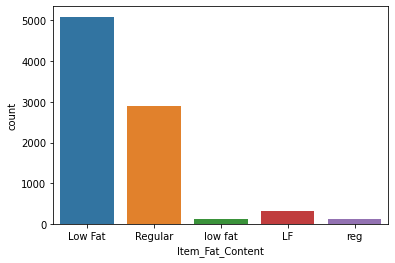

In [103]:
sns.countplot(x=train_data['Item_Fat_Content'])


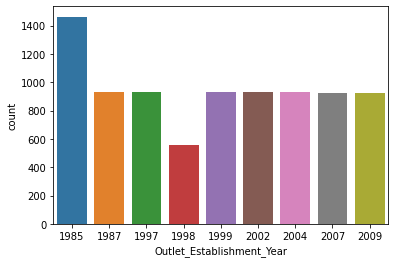

In [104]:
sns.countplot(x=train_data['Outlet_Establishment_Year'])

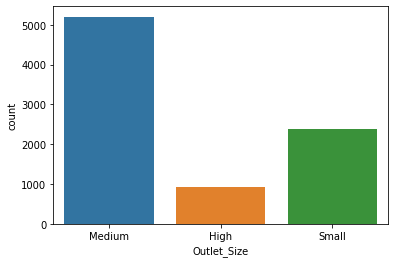

In [105]:
sns.countplot(x=train_data['Outlet_Size'])

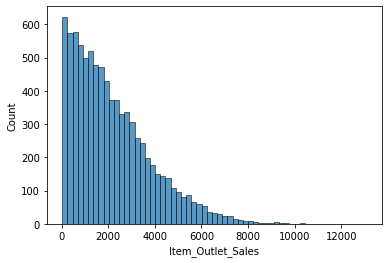

In [106]:
sns.histplot(x=train_data['Item_Outlet_Sales'])

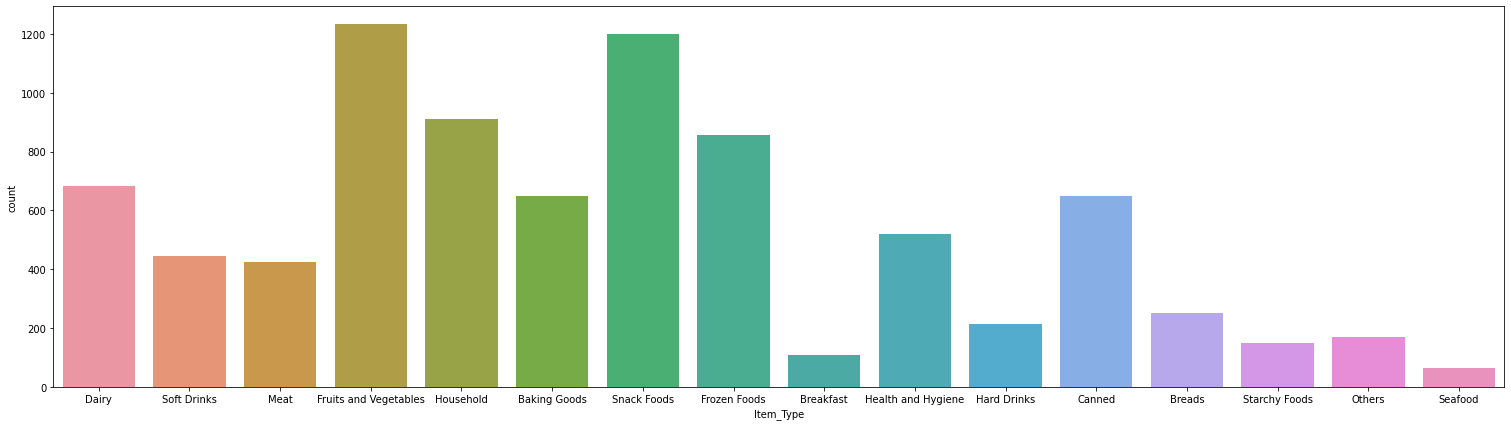

In [107]:
plt.figure(figsize=(26,7))
sns.countplot(x=train_data['Item_Type'])
plt.show()

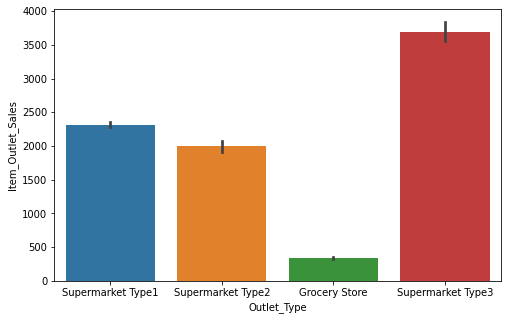

In [108]:
plt.figure(figsize=(8,5))
sns.barplot(x=train_data['Outlet_Type'],y=train_data['Item_Outlet_Sales'])

<function matplotlib.pyplot.show(*args, **kw)>

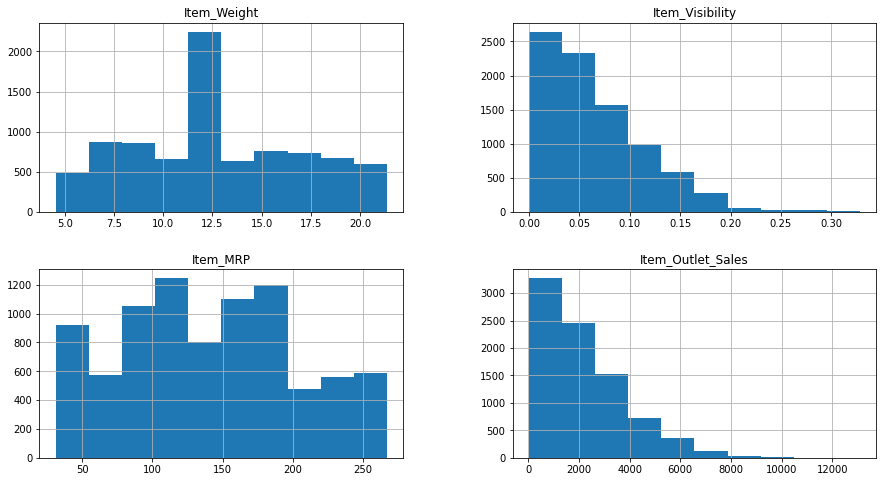

In [109]:
freqgraph=train_data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,8))
plt.show


**split train and test data**

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X=df.drop('Item_Outlet_Sales',axis=1)

In [112]:
y=df['Item_Outlet_Sales']

In [113]:
X_test = df1

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=42)

**Linear Regression**

In [115]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions_lr=model.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error,r2_score

In [117]:
print('Mean squared error is:',mean_squared_error(y_test,predictions_lr))
print('R squared value is:',r2_score(y_test,predictions_lr))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,predictions_lr)))
R1 = np.sqrt(mean_squared_error(y_test,predictions_lr))

Mean squared error is: 359395.16580542835
R squared value is: 0.563265894559545
Root Mean Square Error : 599.4957596225585


**Lasso Regression**

In [118]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)

In [119]:
model=lasso.fit(X_train,y_train)
predictions_lo=model.predict(X_test)

In [120]:
print('Mean squared error is:',mean_squared_error(y_test,predictions_lo))
print('R squared value is:',r2_score(y_test,predictions_lo))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,predictions_lo)))
R2 = np.sqrt(mean_squared_error(y_test,predictions_lo))

Mean squared error is: 359343.07072920294
R squared value is: 0.5633292000758063
Root Mean Square Error : 599.4523089697819


**kNN**

In [121]:
from sklearn.neighbors import KNeighborsRegressor

In [122]:
kNN = KNeighborsRegressor(n_neighbors=10)
kNN.fit(X_train,y_train)
y_pred_kNN = kNN.predict(X_test)

In [123]:
print('Mean squared error is:',mean_squared_error(y_test,y_pred_kNN))
print('R squared value is:',r2_score(y_test,y_pred_kNN))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,y_pred_kNN)))
R3 = np.sqrt(mean_squared_error(y_test,y_pred_kNN))

Mean squared error is: 543031.1719002932
R squared value is: 0.3401129017563028
Root Mean Square Error : 736.9064878940158


**Decision Tree Regressor**

In [124]:
from sklearn.tree import DecisionTreeRegressor

In [125]:
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [126]:
print('Mean squared error is:',mean_squared_error(y_test,y_pred_dt))
print('R squared value is:',r2_score(y_test,y_pred_dt))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,y_pred_dt)))
R4 = np.sqrt(mean_squared_error(y_test,y_pred_dt))

Mean squared error is: 332156.1813099914
R squared value is: 0.5963664887204623
Root Mean Square Error : 576.3299240105371


**Random Forest Regressor**

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [129]:
print('Mean squared error is:',mean_squared_error(y_test,y_pred_rf))
print('R squared value is:',r2_score(y_test,y_pred_rf))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
R5 = np.sqrt(mean_squared_error(y_test,y_pred_rf))

Mean squared error is: 308177.29441486945
R squared value is: 0.6255054385839909
Root Mean Square Error : 555.1371852207969


Ada Boost Regressor 

In [130]:
from sklearn.ensemble import AdaBoostRegressor 

In [131]:
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [132]:
print('Mean squared error is:',mean_squared_error(y_test,y_pred_ada ))
print('R squared value is:',r2_score(y_test,y_pred_ada ))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,y_pred_ada )))
R6 = np.sqrt(mean_squared_error(y_test,y_pred_ada ))

Mean squared error is: 315241.4274413085
R squared value is: 0.6169211611324559
Root Mean Square Error : 561.4636474797887


**Model results**

In [133]:
metric_results= {'Model': ['linear Regression','lasso' ,'KNeighbors', 'Decision Tree','RandomForest','AdaBoost'], 
                 'Rmse': [R1, R2, R3,R4,R5,R6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,Rmse
0,linear Regression,599.495760
1,lasso,599.452309
2,KNeighbors,736.906488
3,Decision Tree,576.329924
4,RandomForest,555.137185
5,AdaBoost,561.463647


*Random Forest gives better result*

**Prediction**

In [134]:
sample=pd.read_csv('/content/sample_submission_8RXa3c6.csv')

In [135]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [136]:
Item_Outlet_Sales=rf.predict(X_test)

In [137]:
rf.predict(X_test)

array([1233.99687194,  749.15834543,  749.15834543, ...,  749.15834543,
        749.15834543, 1371.7226668 ])

In [138]:
Item_Outlet_Sales=pd.DataFrame(Item_Outlet_Sales,columns=['Item_Outlet_Sales'])

In [139]:
sample['Item_Outlet_Sales']=Item_Outlet_Sales

In [140]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1233.996872
1,FDW14,OUT017,749.158345
2,NCN55,OUT010,749.158345
3,FDQ58,OUT017,2396.955530
4,FDY38,OUT027,2231.464955


In [141]:
sample.isna().sum()

Item_Identifier         0
Outlet_Identifier       0
Item_Outlet_Sales    3976
dtype: int64

**final csv**

In [71]:
#pd.DataFrame(sample).to_csv("sales_prediction.csv",index=False)